In [86]:
import numpy as np
import pandas as pd


# Data cleaning

In [87]:
datasets_path = '../data/DataSets'

In [88]:
titanic = pd.read_csv(f'{datasets_path}/titanic-train.csv')

### Data dictionary

<table style="margin-left:0">
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

### Variable Notes

pclass: A proxy for socio-economic status (SES)

- 1st = Upper

- 2nd = Middle

- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way:

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way:

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

#### Display basic info about dataframe columns, types of values contained in those columns.

In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Get a report for the missing values

In [90]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

#### Look at the dataframe. Do you spot some irrelevant columns? (Columns that present info that will not be used anywhere or columns with a lot of missing values). Get rid of them.

In [92]:
titanic = titanic.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
titanic.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  71.2833        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S

#### Get the percentage (because we have only 0 and 1 we can get it as the mean) of people that survived from each Pclass, ordered descending

Hint: filter the two columns, group by the column you are trying to analyze, get the necessary aggregate, order the results

In [93]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

#### Get the percentage of people that survived from each SibSp

Hint: filter the two columns, group by the column you are trying to analyze, get the necessary aggregate, order the results

In [94]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

#### Get the percentage of people that survived from each Parch


Hint: filter the two columns, group by the column you are trying to analyze, get the necessary aggregate, order the results

In [95]:
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

#### Create new feature `FamilySize` combining existing features (SibSp and Parch)

Hint: the new column will the the sum of those two plus 1 (the current person)

In [96]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

#### Get the percentage of people that survived from each `FamilySize`

*(Same as above)*

In [97]:
titanic[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

#### Create a new feature based on Family size, named `IsAlone`

In [98]:
titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] >= 1, 'IsAlone'] = 1

titanic[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

IsAlone  Survived
0        1  0.383838

#### We should pick one of these two, because they tell us the same information. Let's stick with 'IsAlone` for now.

In [99]:
titanic = titanic.drop(columns=['FamilySize'])

#### Create a new feature, named `title`, taken from name prefix

In [100]:
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic['Title'], titanic['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

#### Put all rare titles into a single column

In [101]:
titanic['Title'] = titanic['Title'].replace([
    'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'
], 'Rare')

titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
    
titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826

#### And transform that column into numerical values

In [102]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

titanic['Title'] = titanic['Title'].map(title_mapping)

#### Drop the name variable, not useful anymore.

In [103]:
titanic = titanic.drop(columns=['Name'])

In [104]:
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  IsAlone  \
0         0       3    male  22.0      1      0   7.2500        S        1   
1         1       1  female  38.0      1      0  71.2833        C        1   
2         1       3  female  26.0      0      0   7.9250        S        1   
3         1       1  female  35.0      1      0  53.1000        S        1   
4         0       3    male  35.0      0      0   8.0500        S        1   

   Title  
0      1  
1      3  
2      2  
3      3  
4      1

#### Basic Fill missing Values for `Emabrked` feature. Fill the values with the mode

In [105]:
freq_port = titanic.Embarked.dropna().mode()[0]
freq_port

'S'

In [108]:
titanic['Embarked'] = titanic['Embarked'].fillna(freq_port)
    

Same as before, analyze the two features ('Embarked' and 'Survived') 

In [109]:
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

#### Converting categorical feature to numeric for `Embarked` column

Hint: `map` method on column of interest

In [110]:
titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [111]:
titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Embarked  IsAlone  \
0         0       3    male  22.0      1      0   7.2500         0        1   
1         1       1  female  38.0      1      0  71.2833         1        1   
2         1       3  female  26.0      0      0   7.9250         0        1   
3         1       1  female  35.0      1      0  53.1000         0        1   
4         0       3    male  35.0      0      0   8.0500         0        1   

   Title  
0      1  
1      3  
2      2  
3      3  
4      1

#### Converting categorical feature to numeric for `Sex` column

In [112]:
titanic['Sex'] = titanic['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  IsAlone  \
0         0       3    0  22.0      1      0   7.2500         0        1   
1         1       1    1  38.0      1      0  71.2833         1        1   
2         1       3    1  26.0      0      0   7.9250         0        1   
3         1       1    1  35.0      1      0  53.1000         0        1   
4         0       3    0  35.0      0      0   8.0500         0        1   

   Title  
0      1  
1      3  
2      2  
3      3  
4      1

#### Take a look at the `Age` feature. 

In [113]:
titanic['Age'].isna().sum()

177

#### It is numeric, and has some missing values. How do we treat them?

Well, the most basic method, that introduces a lot of noise, especially because the percent of missing values is not that low, is to replace the NaN values by the mean or median of the whole dataset.

Another option is to generate random numbers between mean and standard deviation. 

However, a more sophisticated and elegant way is to get the mean/median values for groups of features. Let's take into consieration `Sex` and `Pclass` for example.

First, we need an array of zeros for each combination of `Sex` and `Pclass`

Hint: look at the number of unique values of these two columns and create a numpy array of that shape

In [114]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Next, iterate over each possible combination, filter the dataframe, get the median value of `Age` and replace it in the original array:

In [115]:
 for i in range(0, 2):
        for j in range(0, 3):
            guess_df = titanic[(titanic['Sex'] == i) & (titanic['Pclass'] == j+1)].copy()['Age'].dropna()

            age_guess = guess_df.median()
            
            # 1 option
            # guess_ages[i,j] = int(age_guess)
            
            # or 2, adding some randomness
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

In [116]:
guess_ages

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

Now complete these values into the missing values of the dataframe:

Hint: iterate over possible combinations using `range()`, for each combination find the rows that have the corresponding values for the columns and the Age is null (filter the dataframe), and assing the value from the array above (use loc function)

In [117]:
for i in range(0, 2):
    for j in range(0, 3):
        titanic.loc[ (titanic.Age.isnull()) & (titanic.Sex == i) & (titanic.Pclass == j+1), 'Age'] = guess_ages[i,j]

In [118]:
titanic['Age'].isna().sum()

0

In [119]:
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  IsAlone  \
0         0       3    0  22.0      1      0   7.2500         0        1   
1         1       1    1  38.0      1      0  71.2833         1        1   
2         1       3    1  26.0      0      0   7.9250         0        1   
3         1       1    1  35.0      1      0  53.1000         0        1   
4         0       3    0  35.0      0      0   8.0500         0        1   

   Title  
0      1  
1      3  
2      2  
3      3  
4      1

Great, now let's divide our Age column in some bins (think of a histogram) and see if certain intervals of the age relate to the survive output.

Hint: look at pandas `cut` method and take 5 slices of the dataframe. Assing the results to a new column.

In [33]:
titanic['AgeBand'] = pd.cut(titanic['Age'], 5)

Check the relation between the new column and the outcome:

(filter, group, aggregate, sort)

In [34]:
titanic[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.336714
2  (32.252, 48.168]  0.412844
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909

Now let's replace the original Age (continous variable) with a categorical (numeric) variable based on the intervals identified before

In [35]:
# titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
# titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
# titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
# titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
# titanic.loc[ titanic['Age'] > 64, 'Age'] = 4
# titanic.head()

Check unique values

In [36]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 31.  , 21.5 , 34.  ,
       15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,
       17.  , 32.  , 16.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### Drop the Interval column created and used earlier

In [37]:
titanic = titanic.drop(columns='AgeBand')

#### Great, now let's do the same for the Fare feature

In [38]:
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4)
titanic[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [39]:
# titanic.loc[ titanic['Fare'] <= 7.91, 'Fare'] = 0
# titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
# titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
# titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3
# titanic['Fare'] = titanic['Fare'].astype(int)

In [40]:
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  IsAlone  \
0         0       3    0  22.0      1      0   7.2500         0        1   
1         1       1    1  38.0      1      0  71.2833         1        1   
2         1       3    1  26.0      0      0   7.9250         0        1   
3         1       1    1  35.0      1      0  53.1000         0        1   
4         0       3    0  35.0      0      0   8.0500         0        1   

   Title         FareBand  
0      1   (-0.001, 7.91]  
1      3  (31.0, 512.329]  
2      2   (7.91, 14.454]  
3      3  (31.0, 512.329]  
4      1   (7.91, 14.454]

In [41]:
titanic = titanic.drop(columns='FareBand')

#### Get the percentage (because we have only 0 and 1 we can get it as the mean) of people that survived from each Sex

In [42]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
1    1  0.742038
0    0  0.188908

#### Transform Sex column into one hot encoding

Hint: check pandas `get_dummies` method

In [120]:
# titanic = pd.get_dummies(titanic, columns=['Sex'], prefix="sex")
titanic

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  IsAlone  \
0           0       3    0  22.0      1      0   7.2500         0        1   
1           1       1    1  38.0      1      0  71.2833         1        1   
2           1       3    1  26.0      0      0   7.9250         0        1   
3           1       1    1  35.0      1      0  53.1000         0        1   
4           0       3    0  35.0      0      0   8.0500         0        1   
..        ...     ...  ...   ...    ...    ...      ...       ...      ...   
886         0       2    0  27.0      0      0  13.0000         0        1   
887         1       1    1  19.0      0      0  30.0000         0        1   
888         0       3    1  21.5      1      2  23.4500         0        1   
889         1       1    0  26.0      0      0  30.0000         1        1   
890         0       3    0  32.0      0      0   7.7500         2        1   

     Title  
0        1  
1        3  
2        2  
3        3  
4        1  
..     ...  
886      5  
887      2  
888      2  
889      1  
890      1  

[891 rows x 10 columns]

# Data inspection

In [121]:
titanic.groupby(titanic['Pclass']).agg({
    'Survived': ['count']
})

Survived
          count
Pclass         
1           216
2           184
3           491

In [45]:
categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'IsAlone', 'Title']
continuous_columns = ['Age', 'Fare']

for column in categorical_columns:
    if column != 'Survived':
        print(titanic.groupby(titanic[column]).agg({
            'Survived': ['count']
        }))
        print(100*'-')
        
print()

for column in continuous_columns:
    if column != 'Survived':
        print(titanic.groupby(titanic['Survived']).agg({
            column: ['mean', 'median']
        }))
        print(100*'-')

       Survived
          count
Pclass         
1           216
2           184
3           491
----------------------------------------------------------------------------------------------------
    Survived
       count
Sex         
0        577
1        314
----------------------------------------------------------------------------------------------------
      Survived
         count
SibSp         
0          608
1          209
2           28
3           16
4           18
5            5
8            7
----------------------------------------------------------------------------------------------------
      Survived
         count
Parch         
0          678
1          118
2           80
3            5
4            4
5            5
6            1
----------------------------------------------------------------------------------------------------
         Survived
            count
Embarked         
0             646
1             168
2              77
---------------------------

# Data visualization

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltb
import seaborn as sns

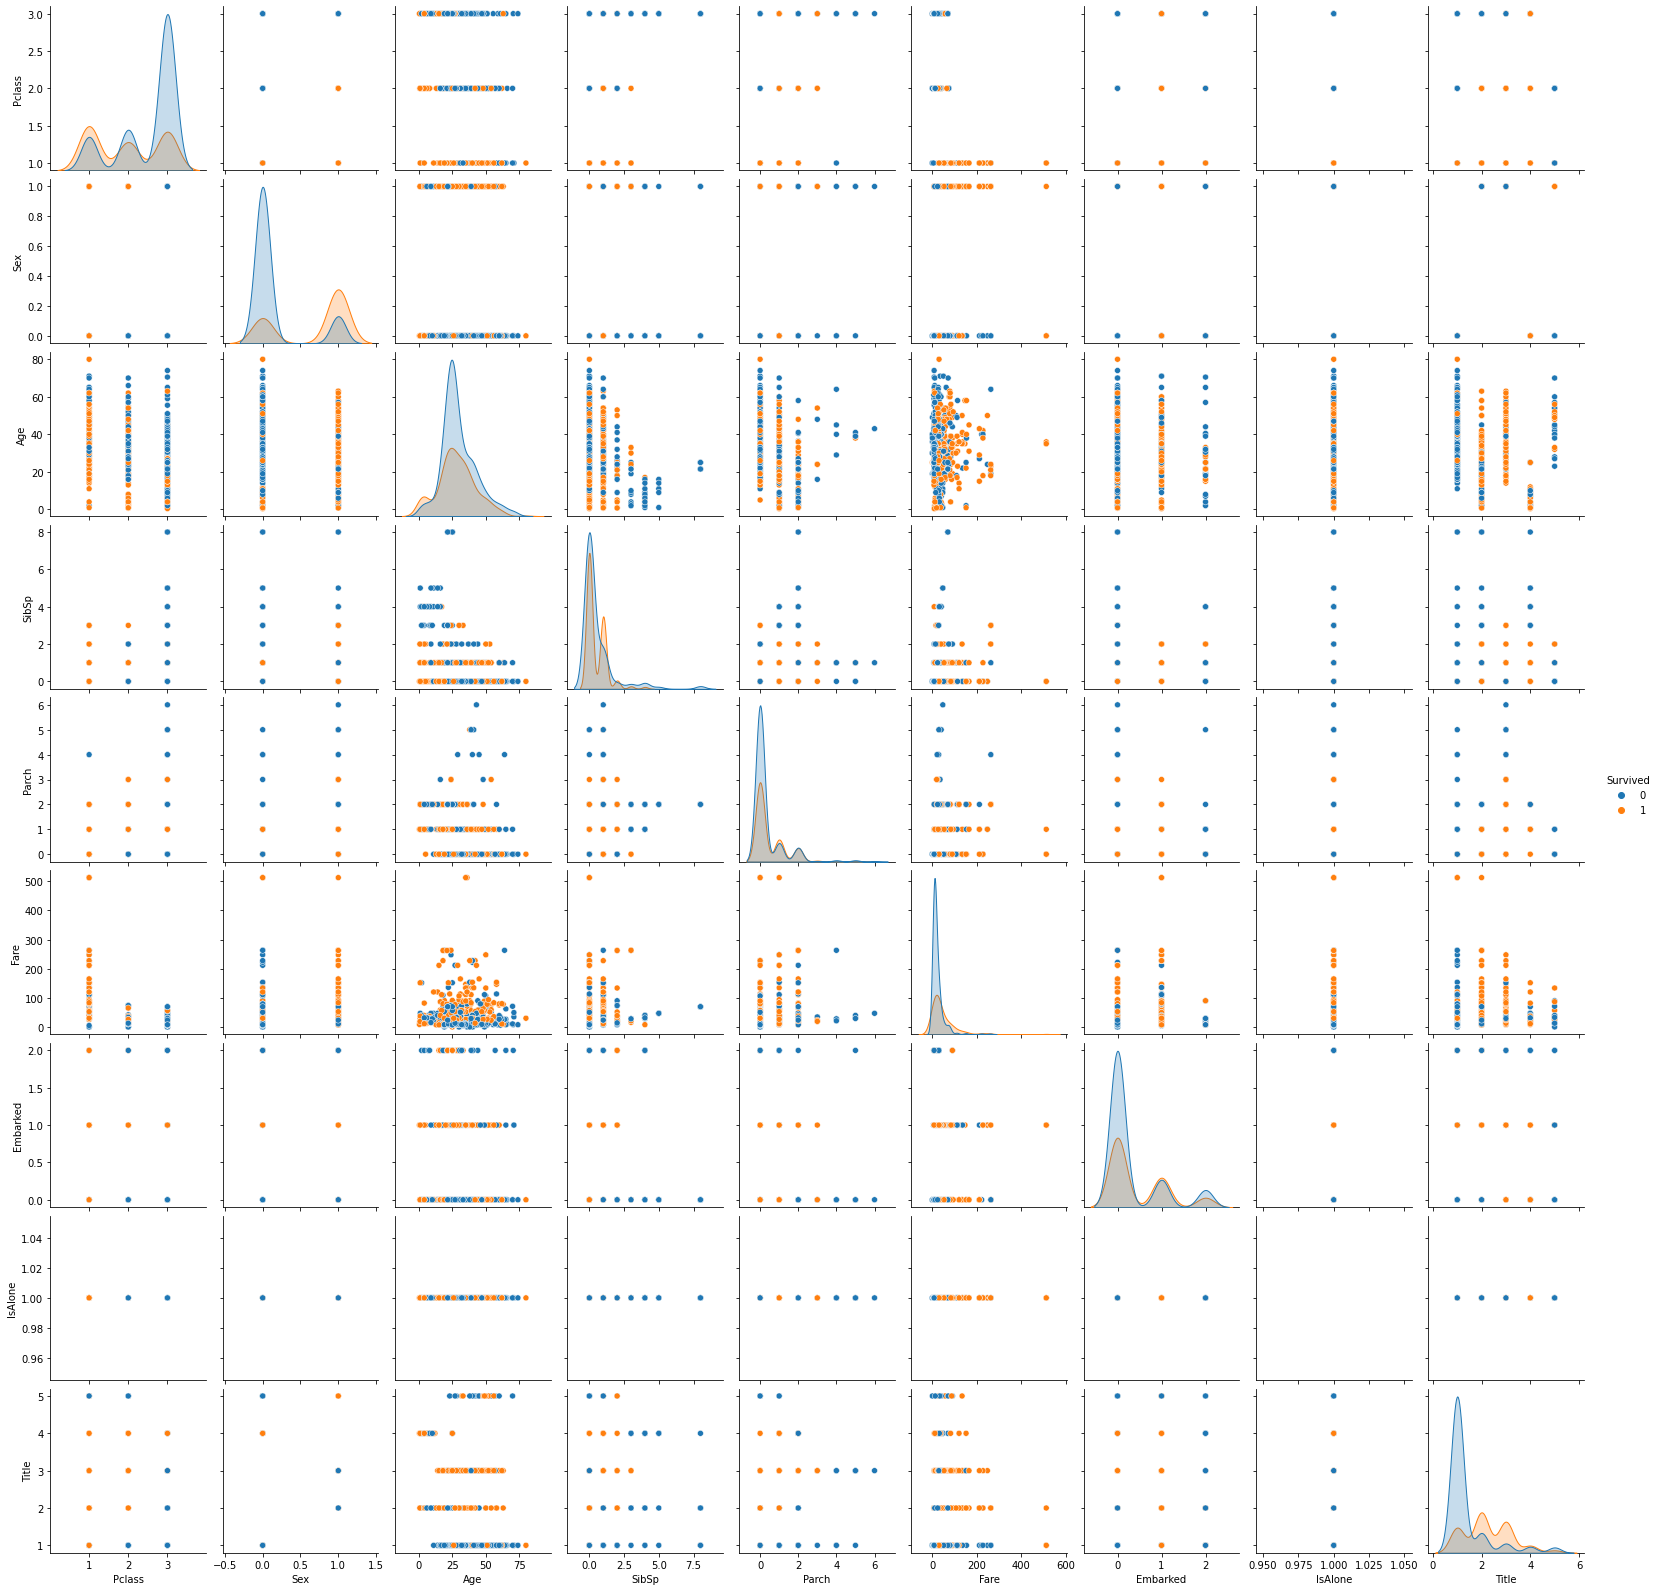

In [47]:
sns.pairplot(data=titanic, hue="Survived")

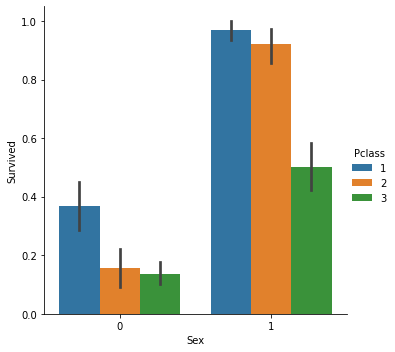

In [49]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=titanic)

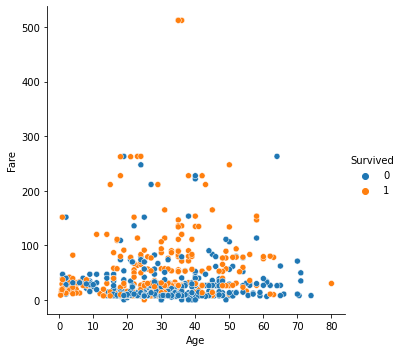

In [50]:
sns.relplot(x="Age", y="Fare", hue="Survived", data=titanic);

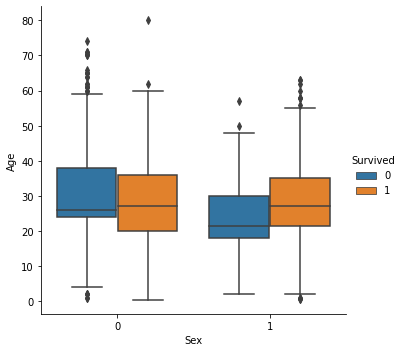

In [51]:
sns.catplot(x="Sex", y="Age", hue="Survived", kind="box", data=titanic)

# Models

In [123]:
y = titanic['Survived']
X = titanic.drop(columns=['Survived'])


In [124]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score# Models

from sklearn.model_selection import cross_val_score, cross_validate

In [125]:
param_grid = {
    'n_estimators': range(100, 400, 100),
    # 'criterion': ['gini', 'entropy', 'log_loss'],
    # 'min_samples_split': range(2, 5),
    # 'min_samples_leaf': range(1, 5)
}

In [ ]:
cv_outer = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)

# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)

    # define search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv_inner)

    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.794, est=0.828, cfg={'n_estimators': 100}
>acc=0.811, est=0.775, cfg={'n_estimators': 100}
>acc=0.785, est=0.816, cfg={'n_estimators': 300}
>acc=0.838, est=0.795, cfg={'n_estimators': 300}
Accuracy: 0.807 (0.020)


In [56]:
# configure the cross-validation procedure
cv_inner = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)

# define search
search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = RepeatedKFold(n_splits=, n_repeats=2, random_state=1)

# execute the nested cross-validation
# scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
scores = cross_validate(search, X, y, scoring=['precision', 'recall', 'accuracy'], cv=cv_outer, n_jobs=-1)
print(scores)

# report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

{'fit_time': array([7.44847512, 7.44047236, 7.95196462, 8.02397108]), 'score_time': array([0.03900218, 0.04300356, 0.09500718, 0.10500574]), 'test_precision': array([0.79354839, 0.72189349, 0.70165746, 0.83006536]), 'test_recall': array([0.67213115, 0.7672956 , 0.75147929, 0.73410405]), 'test_accuracy': array([0.79372197, 0.81123596, 0.78475336, 0.83820225])}


In [57]:
scores['test_accuracy'].mean()

0.8069783846425153

# Results

In [58]:
results = pd.DataFrame(columns=['model', 'accuracy', 'recall', 'precision'])

In [59]:
new_row = pd.Series({
    'model': 'Random Forest', 
    'accuracy': scores['test_accuracy'].mean(),
    'recall': scores['test_recall'].mean(),
    'precision': scores['test_precision'].mean()
})

pd.concat([results, new_row.to_frame().T], ignore_index=True)

model  accuracy    recall precision
0  Random Forest  0.806978  0.731253  0.761791